# graph/contours

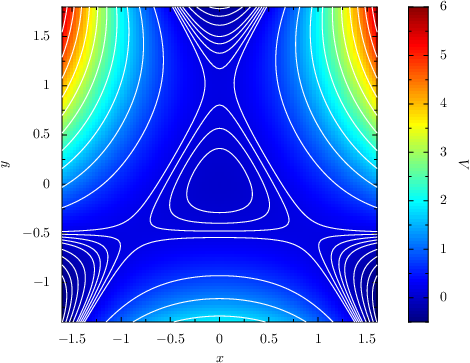

In [1]:
import numpy as np
from skimage.measure import find_contours
from pyx import color, graph

xmax = 1.6
xmin = -xmax
ymin = -1.4
ymax = 1.8
npts = 101
x, y = np.mgrid[xmin:xmax:npts*1j, ymin:ymax:npts*1j]
z = 0.5*(x*x+y*y)+(x*x*y-y**3/3)
data = list(zip(x.flat, y.flat, z.flat))

g = graph.graphxy(height=8, width=8,
                  x=graph.axis.linear(min=xmin, max=xmax, title="$x$"),
                  y=graph.axis.linear(min=ymin, max=ymax, title="$y$"))
g.plot(graph.data.points(data, x=1, y=2, color=3),
       [graph.style.density(gradient=color.gradient.Jet,
                            coloraxis=graph.axis.linear(min=-0.5, max=6,
                                                        title="$V$"))])

for contourlevel in np.concatenate((np.arange(-0.4, 0, 0.1),
                                    np.arange(0, 0.2, 0.05),
                                    np.arange(0.2, 6, 0.5)
                                   )):
    contours = find_contours(z, contourlevel)
    for contourdata in contours:
        contourdata_rescaled = [(xmin+(xmax-xmin)*x/(npts-1),
                                 ymin+(ymax-ymin)*y/(npts-1))
                                for x, y, in contourdata]
        g.plot(graph.data.points(contourdata_rescaled, x=1, y=2),
               [graph.style.line([color.rgb(1, 1, 1)])])
g